In [1]:
import numpy as np
import netCDF4 as nc
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import cartopy as crt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import datetime as dt
from shapely import geometry
import sys
sys.path.insert(0, '/ocean/eolson/MEOPAR/northernNO3PaperCalcs/notebooks/')
import NorthNut as nn
from salishsea_tools.places import PLACES
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
#mpl.rc('text.latex', preamble = ','.join(r'''
# \usepackage{txfonts}
# \usepackage{lmodern}
# '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    bathy=np.sum(mesh.variables['tmask'][0,:,:,:]*mesh.variables['e3t_0'][0,:,:,:],0)
    tmask=mesh.variables['tmask'][:,:,:,:]
thalweg_pts = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=' ', dtype=int)
thlons=[navlon[jj,ii] for (jj,ii) in thalweg_pts]
thlats=[navlat[jj,ii] for (jj,ii) in thalweg_pts]
iso90_pts=np.loadtxt('/ocean/eolson/MEOPAR/analysis-elise/notebooks/NorthernNitrate/ts90.txt', delimiter=' ', dtype=int)
iso90=np.array([[a,b] for (a,b) in iso90_pts if ((a-644)<130)])
iso90_DIAN=np.array([[a-644,b-112] for (a,b) in iso90])

In [3]:
s3lon,s3lat=PLACES['S3']['lon lat']

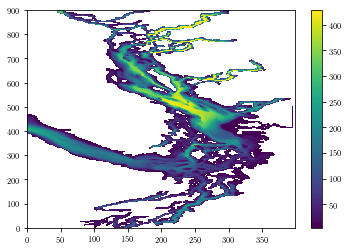

In [4]:
plt.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,bathy))
plt.colorbar()

In [5]:
bc=.85
cm2=mpl.colors.ListedColormap(((bc,bc,bc),(1,1,1)))

In [10]:
np.shape(tmask)
tmask2=tmask[0,0,:,:]
tmask[1:,:]=np.maximum(tmask[:-1])

(1, 40, 898, 398)

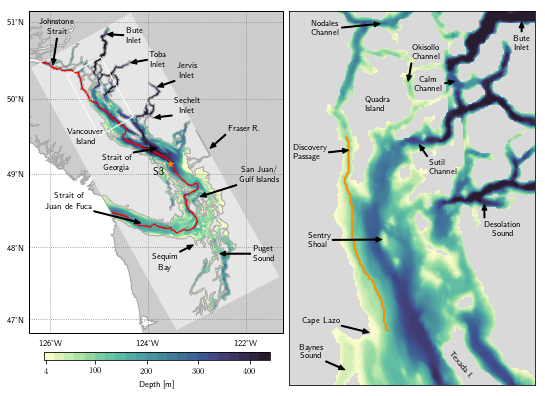

In [15]:
fig = plt.figure(figsize=(7.48,5.3))
#gs = fig.add_gridspec(1, 2)
cax = fig.add_axes([0.079, 0.075, 0.42, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.052, 0.104, 0.47, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
ax0.set_extent(xlim + ylim)
imap=True
if imap==True:
    ax0.add_feature(crt.feature.GSHHSFeature('full', edgecolor='darkgray', facecolor=(.8,.8,.8)))
    verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
           [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
           [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
           [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]
    poly = geometry.polygon.Polygon(verts)
    p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), edgecolor=None,lw=1, zorder=1)
    #gl = ax0.gridlines(crs=crt.crs.PlateCarree(), draw_labels=True,
    #              linewidth=1, color='gray', alpha=1, linestyle=':')
    c = ax0.contourf(navlon, navlat, np.ma.masked_where(tmask[0,0,:,:]==0,bathy),25,vmin=4,vmax=430,
        cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
    mm=ax0.contour(navlon, navlat, tmask[0,0,:,:],levels=[-0.01, 0.01], linewidths=1,colors='darkgray', 
            transform=crt.crs.PlateCarree(), zorder=2)
    p=ax0.plot(thlons,thlats,'r-', transform=crt.crs.PlateCarree(), linewidth=1)
    cbar=fig.colorbar(c, cax=cax, label='Depth [m]',ticks=[4,100,200,300,400],orientation='horizontal')
    cax.set_ylim((4/430,1))
    ax0.annotate('Fraser R.',xy=(1.23e5,6.3e6),xytext=(1.63e5,6.34e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax0.annotate('Strait of\nGeorgia',xy=(0.01e5,6.30e6),xytext=(-.9e5,6.25e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Sechelt\nInlet',xy=(-0.04e5,6.37e6),xytext=(0.7e5,6.38e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Toba\nInlet',xy=(-0.58e5,6.495e6),xytext=(0.05e5,6.485e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Bute\nInlet',xy=(-1.12e5,6.56e6),xytext=(-0.5e5,6.54e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Jervis\nInlet',xy=(0.03e5,6.44e6),xytext=(0.7e5,6.46e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.plot(s3lon,s3lat,'*',color='darkorange',transform=crt.crs.PlateCarree())
    ax0.text(s3lon-.35,s3lat-.15,'S3',transform=crt.crs.PlateCarree())
    ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Sequim\nBay',xy=(0.85e5,6.08e6),xytext=(0.2e5,6.04e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
    ax0.annotate('Strait of\nJuan de Fuca',xy=(-0.35e5,6.13e6),xytext=(-2.0e5,6.18e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
    ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
    ax0.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.19e6),xytext=(2.35e5,6.24e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
    ax0.annotate('Vancouver\nIsland', xy=(-1.6e5,6.31e6), fontsize=8,ha='center')
    # jervis inlet, sechelt inlet, toba inlet, okeover inlet, queen charlotte strait, saanich inlet, 
    #haro strait, rosario strait, active pass, admiralty inlet
    temp=ax0.get_xlim()
    temp2=ax0.get_ylim()
    #print(temp,temp2)
    xlocs=ticker.FixedLocator(np.arange(np.floor(xlim[0]-1), np.ceil(xlim[1])+2,2))
    ylocs = ticker.FixedLocator(np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1))
    gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    a=18
imap2=True
if imap2:
    ax1.contourf(bathy[nn.jg0-a:nn.jg1+int(3*a),nn.ig0-a:nn.ig1+a],levels=50,cmap=cmocean.cm.deep)
    ax1.contourf(np.ma.masked_where(tmask[0,0,nn.jg0-a:nn.jg1+int(3*a),nn.ig0-a:nn.ig1+a]==1,
                                    tmask[0,0,nn.jg0-a:nn.jg1+int(3*a),nn.ig0-a:nn.ig1+a]),levels=(-.5,.5,1.5),cmap=cm2)
    #ax1.contour(tmask[0,0,nn.jg0-a:nn.jg1+int(3*a),nn.ig0-a:nn.ig1+a],levels=(-.5,.5),linewidths=1,colors=((.8,.8,.8),))
    p=ax1.plot(iso90_DIAN[:,1]+a,iso90_DIAN[:,0]+a,'-',color='darkorange', linewidth=2)
    ax1.set_aspect(1)
    ax1.set_xticks([],[]);
    ax1.set_yticks([],[]);
    ax1.annotate('Cape Lazo', xy=(43,28), xytext=(7,33),
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax1.annotate('Baynes\nSound', xy=(30,8), xytext=(12,13),va='bottom',ha='center',linespacing=.8,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax1.annotate('Discovery\nPassage', xy=(32,126), xytext=(2,121),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax1.annotate('Quadra\nIsland', xy=(41,147), fontsize=8,linespacing=1)
    #ax1.annotate('Okisollo\nChannel', xy=(57,161), fontsize=8)
    ax1.annotate('Okisollo\nChannel', xy=(64,163), xytext=(66,175),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    #ax1.annotate('Nodales\nChannel', xy=(47,190), fontsize=8)
    ax1.annotate('Nodales\nChannel', xy=(49,194), xytext=(12,188),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    #ax1.annotate('Calm\nChannel', xy=(82,161), fontsize=8,linespacing=.8)
    ax1.annotate('Calm\nChannel', xy=(89,163), xytext=(75,158),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    #ax1.annotate('Sutil\nChannel', xy=(65,127), fontsize=8,linespacing=.8)
    ax1.annotate('Sutil\nChannel', xy=(70,129), xytext=(75,113),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    #ax1.annotate('Desolation\nSound', xy=(100,97), fontsize=8,linespacing=.8)
    ax1.annotate('Desolation\nSound', xy=(105,97), xytext=(115,80),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax1.annotate('Sentry\nShoal', xy=(50,78), xytext=(10,74),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    #ax1.annotate('Bute Inlet', xy=(103,195), fontsize=8)
    ax1.annotate('Bute\nInlet', xy=(125,195), xytext=(125,180),linespacing=1,
                arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax1.annotate('Texada I.', xy=(85,15), fontsize=8,rotation=-50)
    lo0,la0=(navlon[nn.jg0-a,nn.ig0-a], navlat[nn.jg0-a,nn.ig0-a])
    lo1,la1=(navlon[nn.jg1+int(3*a),nn.ig0-a], navlat[nn.jg1+int(3*a),nn.ig0-a])
    lo2,la2=(navlon[nn.jg1+int(3*a),nn.ig1+a], navlat[nn.jg1+int(3*a),nn.ig1+a])
    lo3,la3=(navlon[nn.jg0-a,nn.ig1+a], navlat[nn.jg0-a,nn.ig1+a])
    ax0.plot((lo0,lo1,lo2,lo3,lo0),(la0,la1,la2,la3,la0),'w-',lw=1,transform=crt.crs.PlateCarree())
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/map.png',dpi=300)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/map.eps',dpi=300)

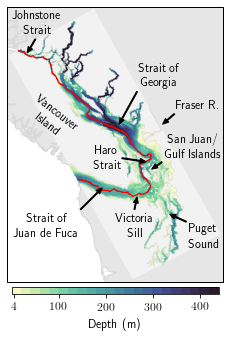

In [7]:
# for slides
fig = plt.figure(figsize=(3.3,4.6))
#gs = fig.add_gridspec(1, 2)
cax = fig.add_axes([0.065, 0.105, 0.87, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.045, 0.093, 0.91, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
#ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
ax0.set_extent(xlim + ylim)
cdark=(.85,.85,.85)
cmid=(.9,.9,.9)
clight=(.95,.95,.95)
imap=True
if imap==True:
    ax0.add_feature(crt.feature.GSHHSFeature('full', edgecolor=cdark, facecolor=cmid))
    verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
           [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
           [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
           [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]
    poly = geometry.polygon.Polygon(verts)
    p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=clight, edgecolor=None,lw=1, zorder=1)

    c = ax0.contourf(navlon, navlat, np.ma.masked_where(tmask[0,0,:,:]==0,bathy),25,vmin=4,vmax=430,
        cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
    mm=ax0.contour(navlon, navlat, tmask[0,0,:,:],levels=[-0.01, 0.01], linewidths=.5,colors=(cdark,), 
            transform=crt.crs.PlateCarree(), zorder=2)
    p=ax0.plot(thlons,thlats,'r-', transform=crt.crs.PlateCarree(), linewidth=1)
    cbar=fig.colorbar(c, cax=cax, ticks=[4,100,200,300,400],orientation='horizontal')
    cbar.ax.tick_params(labelsize=12) 
    cbar.set_label(label='Depth (m)',size=12) 
    cax.set_ylim((4/430,1))
    ax0.annotate('Fraser R.',xy=(1.26e5,6.3e6),xytext=(1.63e5,6.34e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12)
    
    ax0.annotate('Strait of\nGeorgia',xy=(0.10e5,6.30e6),xytext=(1.15e5,6.4e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center')
    
    ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.1e5,6.54e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center')
    
    ax0.annotate('Strait of\nJuan de Fuca',xy=(-0.35e5,6.13e6),xytext=(-1.85e5,6.03e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center',va='center')
    ax0.annotate('Victoria\nSill',xy=(0.58e5,6.106e6),xytext=(.50e5,6.03e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center',va='center')
    
    ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.35e5,6.0e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center',va='center')
    
    ax0.annotate('San Juan/\nGulf Islands',xy=(0.97e5,6.18e6),xytext=(2.05e5,6.24e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center',va='center')
    ax0.annotate('Haro\nStrait',xy=(0.82e5,6.20e6),xytext=(-0.24e5,6.21e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=12,ha='center',va='center')
    ax0.annotate('Vancouver\nIsland', xy=(-1.67e5,6.32e6), fontsize=12,ha='center',rotation=-38)
    # jervis inlet, sechelt inlet, toba inlet, okeover inlet, queen charlotte strait, saanich inlet, 
    #haro strait, rosario strait, active pass, admiralty inlet
    temp=ax0.get_xlim()
    temp2=ax0.get_ylim()
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/mapThW.png',dpi=300)